# Домашнє завдання №9

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

## Завантаження датасету

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print("Розмір тренувального датасету:", len(train_data))
print("Перший елемент тренувального датасету:", train_data[0])
print("Мітки тренувального датасету:", train_labels)
print("Значення мітоки: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Перший елемент тренувального датасету: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


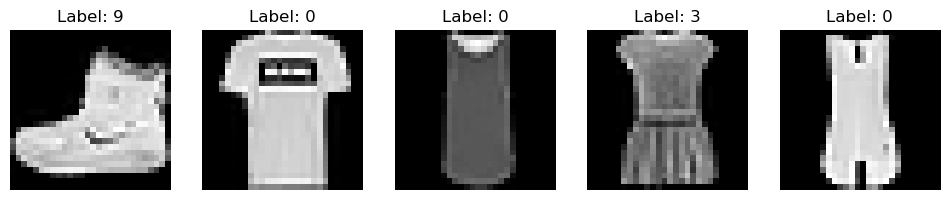

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()


## Початкові значення параметрів

In [6]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 20 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

n_hidden_1 = 64 # кількість нейронів 1-го шару
n_hidden_2 = 64 # кількість нейронів 2-го шару

In [7]:
from keras.utils import to_categorical

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(train_data, np.float32), np.array(test_data, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Перетворюємо цілочисельні мітки на тип float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Перетворюємо мітки в категорійний формат
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


## Створення моделі

## Конфігурація №1:
1. Кількість шарів - 2
2. Функція активації внутрішнього шару - ReLU
3. Кількість нейронів внутрішнього шару - 64
4. Кількість епох - 20
5. Розмір батчу - 256
6. Оптимізатор - RMSprop
7. Швидкість начання - 0.001

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dense(num_classes, activation='softmax'),                    
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
def model_fit(model):
    history = model.fit(
        partial_x_train, 
        partial_y_train, 
        epochs=training_steps,
        batch_size=batch_size,
        validation_data=(x_val, y_val)
    )
    return history

In [12]:
def history_visual(history):    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

Epoch 1/20


196/196 [==============================] - 1s 4ms/step - loss: 0.7077 - accuracy: 0.7622 - val_loss: 0.5722 - val_accuracy: 0.8051
Epoch 2/20
196/196 [==============================] - 1s 3ms/step - loss: 0.4816 - accuracy: 0.8308 - val_loss: 0.4792 - val_accuracy: 0.8316
Epoch 3/20
196/196 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8476 - val_loss: 0.4328 - val_accuracy: 0.8486
Epoch 4/20
196/196 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8581 - val_loss: 0.4075 - val_accuracy: 0.8582
Epoch 5/20
196/196 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.8629 - val_loss: 0.4401 - val_accuracy: 0.8318
Epoch 6/20
196/196 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8682 - val_loss: 0.4275 - val_accuracy: 0.8467
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 0.3541 - accuracy: 0.8728 - val_loss: 0.3767 - val_accuracy: 0.8669
Epoc

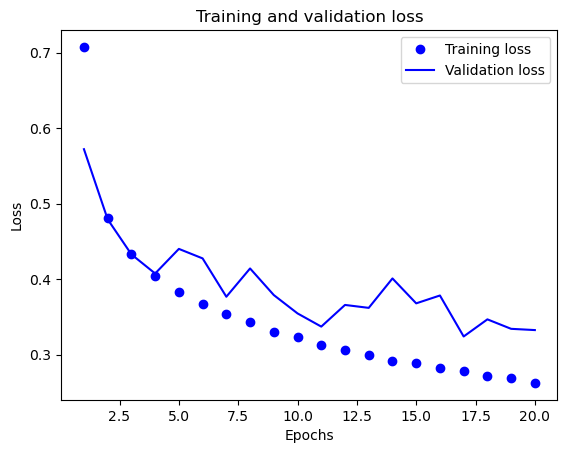

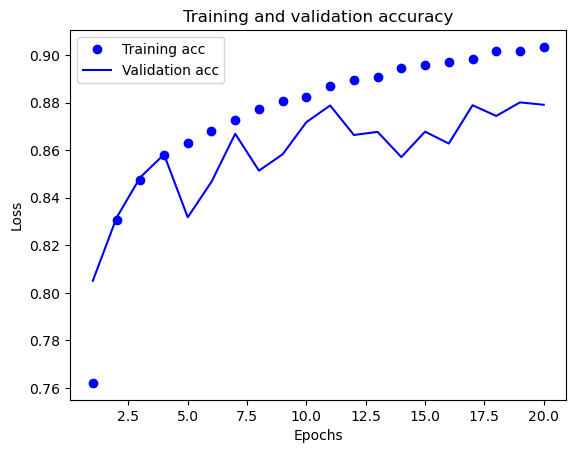

In [13]:
history = model_fit(model)
history_visual(history)

## Висновок №1
Побудована модель показала непогані результати на навчальній вибірці: точність нейромережі становить приблизно 91%. Однак, на валідаційних даних результати гірші: максимальна точність склала 88.5%. Змінимо параметри нашої моделі і проведемо другий етап експерименту.

## Конфігурація №2:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - ReLU
3. Кількість нейронів 1 внутрішнього шару - 256
3. Кількість нейронів 2 внутрішнього шару - 128
4. Кількість епох - 40
5. Розмір батчу - 250
6. Оптимізатор - RMSprop
7. Швидкість начання - 0.001

Epoch 1/40
200/200 [==============================] - 2s 6ms/step - loss: 0.6559 - accuracy: 0.7639 - val_loss: 0.4548 - val_accuracy: 0.8312
Epoch 2/40
200/200 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.8372 - val_loss: 0.3815 - val_accuracy: 0.8610
Epoch 3/40
200/200 [==============================] - 1s 5ms/step - loss: 0.3795 - accuracy: 0.8600 - val_loss: 0.3441 - val_accuracy: 0.8723
Epoch 4/40
200/200 [==============================] - 1s 5ms/step - loss: 0.3471 - accuracy: 0.8711 - val_loss: 0.3257 - val_accuracy: 0.8794
Epoch 5/40
200/200 [==============================] - 1s 5ms/step - loss: 0.3246 - accuracy: 0.8787 - val_loss: 0.3326 - val_accuracy: 0.8756
Epoch 6/40
200/200 [==============================] - 1s 5ms/step - loss: 0.3045 - accuracy: 0.8873 - val_loss: 0.3210 - val_accuracy: 0.8794
Epoch 7/40
200/200 [==============================] - 1s 6ms/step - loss: 0.2888 - accuracy: 0.8910 - val_loss: 0.2996 - val_accuracy: 0.8910
Epoch 

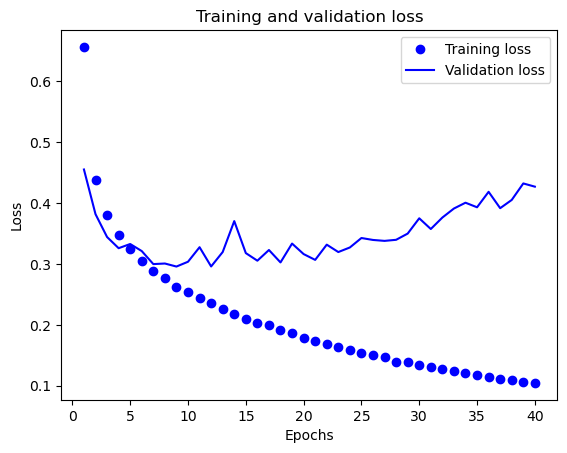

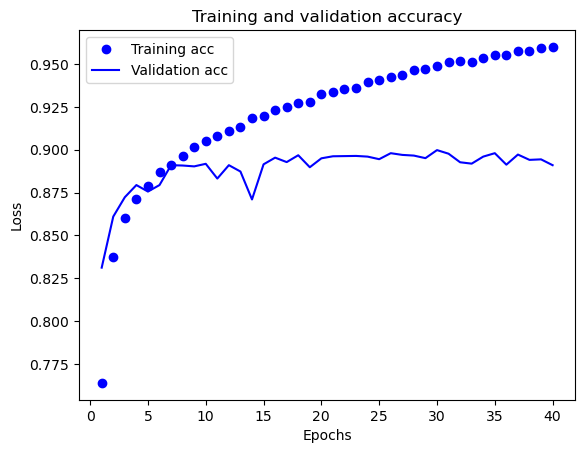

In [14]:
learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 40 # число епох
batch_size = 250 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
n_hidden_1 = 256 # кількість нейронів 1-го шару
n_hidden_2 = 128 # кількість нейронів 2-го шару

model1 = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dense(n_hidden_2, activation='relu'),
    Dense(num_classes, activation='softmax'),                    
])

model1.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

history1 = model_fit(model1)
history_visual(history1)

## Висновок №2
Побудована модель показала кращі результати на навчальній вибірці: точність нейромережі становить приблизно 96%. На валідаційних даних  максимальна точність склала 90%. Спробуємо покращити модель за рахунок регуляризації.

## Конфігурація №3:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - ReLU
3. Кількість нейронів 1 внутрішнього шару - 256
3. Кількість нейронів 2 внутрішнього шару - 128
4. Кількість епох - 40
5. Розмір батчу - 250
6. Оптимізатор - RMSprop
7. Швидкість начання - 0.001
8. Метод регуляризації - Dropout

Epoch 1/40
200/200 [==============================] - 2s 8ms/step - loss: 0.8360 - accuracy: 0.7057 - val_loss: 0.4762 - val_accuracy: 0.8317
Epoch 2/40
200/200 [==============================] - 1s 6ms/step - loss: 0.5430 - accuracy: 0.8061 - val_loss: 0.4124 - val_accuracy: 0.8497
Epoch 3/40
200/200 [==============================] - 1s 6ms/step - loss: 0.4866 - accuracy: 0.8280 - val_loss: 0.3791 - val_accuracy: 0.8621
Epoch 4/40
200/200 [==============================] - 1s 7ms/step - loss: 0.4524 - accuracy: 0.8402 - val_loss: 0.3734 - val_accuracy: 0.8607
Epoch 5/40
200/200 [==============================] - 1s 7ms/step - loss: 0.4339 - accuracy: 0.8467 - val_loss: 0.3608 - val_accuracy: 0.8704
Epoch 6/40
200/200 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.8526 - val_loss: 0.3534 - val_accuracy: 0.8727
Epoch 7/40
200/200 [==============================] - 1s 6ms/step - loss: 0.4038 - accuracy: 0.8564 - val_loss: 0.3453 - val_accuracy: 0.8702
Epoch 

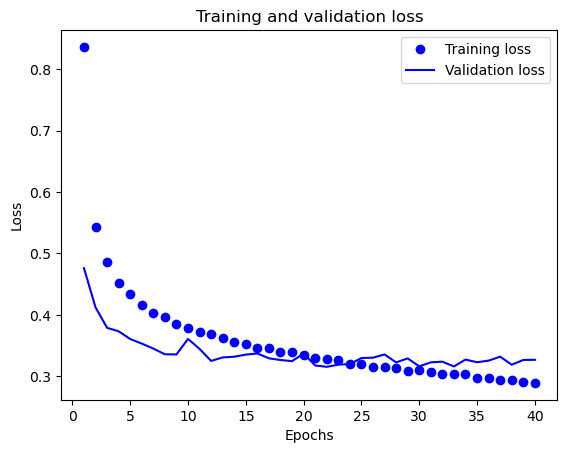

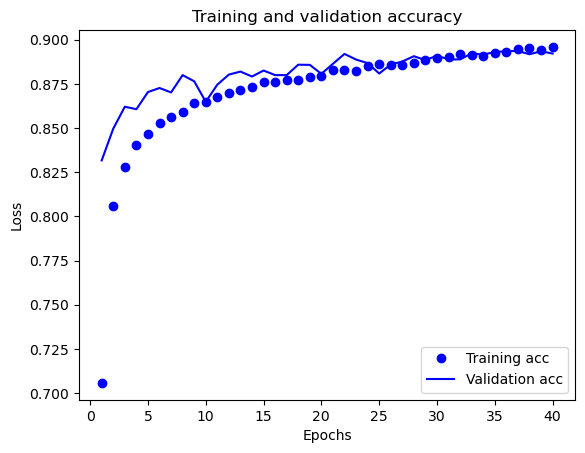

In [15]:
from keras.layers import Dropout

training_steps = 40

model2 = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dropout(0.5),  
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model2.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

history2 = model_fit(model2)
history_visual(history2)

## Висновок №3
Побудована модель містить регуляризатор Dropout, який випадковим чином вимикає деякі нейрони під час навчання, тим самим роблячи мережу більш стійкою. Але модель при цьому показала дещо гірші результати на навчальній вибірці: точність нейромережі становить приблизно 89%. На валідаційних даних  максимальна точність теж склала 89%. Спробуємо покращити модель за рахунок інших методів оптимізації.

## Конфігурація №4:
До попередніх налаштувань використаємо планувальник швидкості навчання

Epoch 1/40
200/200 [==============================] - 2s 8ms/step - loss: 0.8276 - accuracy: 0.7041 - val_loss: 0.4891 - val_accuracy: 0.8179
Epoch 2/40
200/200 [==============================] - 1s 7ms/step - loss: 0.5381 - accuracy: 0.8090 - val_loss: 0.4146 - val_accuracy: 0.8474
Epoch 3/40
200/200 [==============================] - 2s 8ms/step - loss: 0.4820 - accuracy: 0.8282 - val_loss: 0.3923 - val_accuracy: 0.8539
Epoch 4/40
200/200 [==============================] - 2s 8ms/step - loss: 0.4517 - accuracy: 0.8385 - val_loss: 0.3734 - val_accuracy: 0.8635
Epoch 5/40
200/200 [==============================] - 1s 6ms/step - loss: 0.4326 - accuracy: 0.8473 - val_loss: 0.3658 - val_accuracy: 0.8702
Epoch 6/40
200/200 [==============================] - 1s 6ms/step - loss: 0.4129 - accuracy: 0.8528 - val_loss: 0.3568 - val_accuracy: 0.8669
Epoch 7/40
200/200 [==============================] - 1s 6ms/step - loss: 0.4000 - accuracy: 0.8583 - val_loss: 0.3482 - val_accuracy: 0.8716
Epoch 

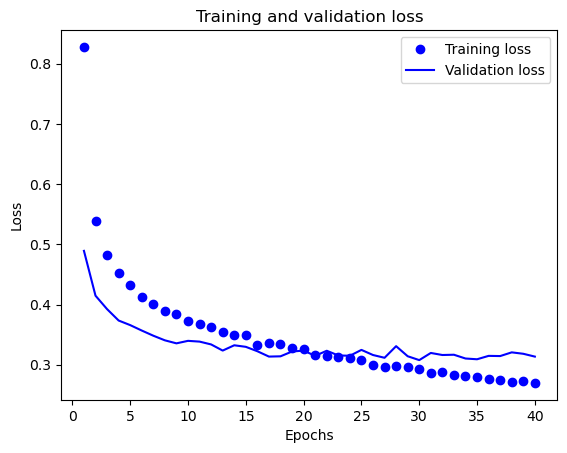

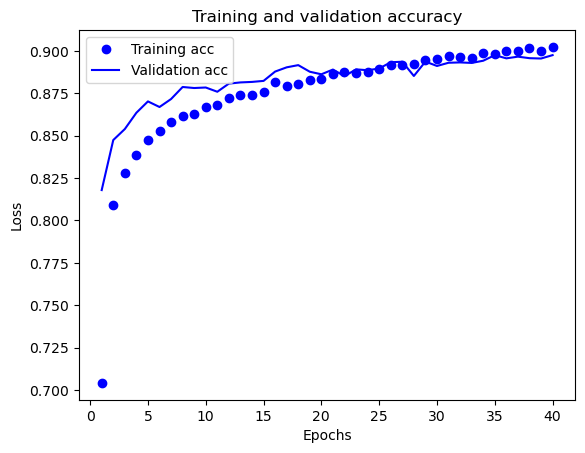

In [17]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import RMSprop

# Параметри для планувальника швидкості навчання
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

model3 = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dropout(0.5),  
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# Використовуємо планувальник для оптимізатора
optimizer = RMSprop(learning_rate=lr_schedule)

model3.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history3 = model_fit(model3)
history_visual(history3)

## Висновок №4
Використання планувальника швидкості навчання дозволило дещо покращити модель: точність нейромережі становить приблизно 90%. На валідаційних даних  максимальна точність теж склала 90%. 

## Конфігурація №5:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - PReLU
3. Кількість нейронів 1 внутрішнього шару - 256
3. Кількість нейронів 2 внутрішнього шару - 128
4. Кількість епох - 50
5. Розмір батчу - 250
6. Оптимізатор - Adam
7. Метод регуляризації - Dropout

Epoch 1/50
200/200 [==============================] - 3s 9ms/step - loss: 0.8390 - accuracy: 0.7028 - val_loss: 0.4782 - val_accuracy: 0.8299
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 0.5252 - accuracy: 0.8132 - val_loss: 0.4116 - val_accuracy: 0.8500
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.4713 - accuracy: 0.8334 - val_loss: 0.3954 - val_accuracy: 0.8515
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.4393 - accuracy: 0.8443 - val_loss: 0.3785 - val_accuracy: 0.8617
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.4210 - accuracy: 0.8492 - val_loss: 0.3653 - val_accuracy: 0.8715
Epoch 6/50
200/200 [==============================] - 2s 8ms/step - loss: 0.4044 - accuracy: 0.8550 - val_loss: 0.3545 - val_accuracy: 0.8711
Epoch 7/50
200/200 [==============================] - 2s 8ms/step - loss: 0.3896 - accuracy: 0.8614 - val_loss: 0.3394 - val_accuracy: 0.8777
Epoch 

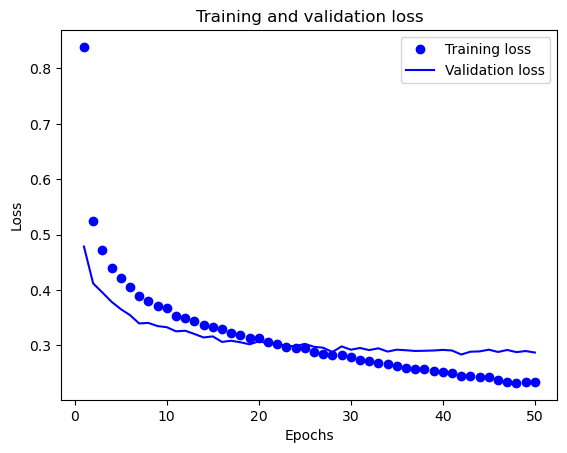

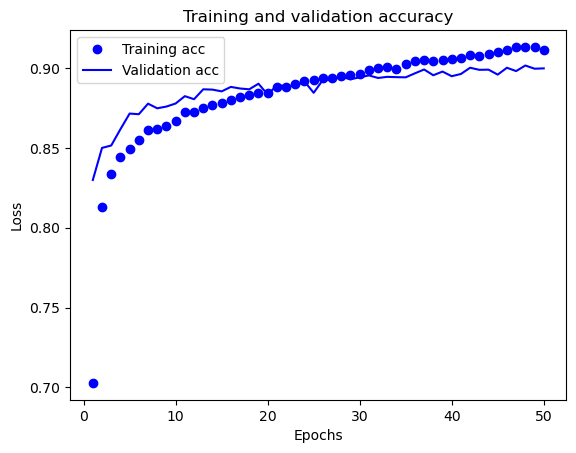

In [29]:
from tensorflow.keras.optimizers import Adam
from keras.layers import PReLU

training_steps = 50

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

model4 = Sequential([
    Dense(n_hidden_1, activation='PReLU', input_shape=(num_features,)),
    Dropout(0.5),  
    Dense(n_hidden_2, activation='PReLU'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# Використовуємо планувальник для оптимізатора
optimizer = Adam(learning_rate=lr_schedule)

model4.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history4 = model_fit(model4)
history_visual(history4)

## Висновок №5
Використання функції активації PReLU і оптимізатора Adam дозволило покращити модель: точність нейромережі становить приблизно 91%. На валідаційних даних  максимальна точність склала 90%.

## Результати роботи моделі на тестових даних

In [35]:
test_loss, test_accuracy = model4.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8917
Test Loss: 0.3193538188934326
Test Accuracy: 0.891700029373169


## Передбачення для тестових даних

In [39]:
predictions = model4.predict(x_test)

print(f'Predictions for the first example: {predictions[0]}')

predicted_classes = np.argmax(predictions, axis=1)

print(f'Predicted classes for the first examples: {predicted_classes[:10]}')
print(f'Real classes for the first examples: {test_labels[:10]}')


313/313 [==============================] - 1s 2ms/step
Predictions for the first example: [1.2252369e-09 4.9746017e-08 6.3682287e-10 2.0680625e-08 4.9929244e-10
 4.9872522e-04 4.8987467e-09 3.2260461e-04 4.3056989e-09 9.9917859e-01]
Predicted classes for the first examples: [9 2 1 1 6 1 4 6 5 7]
Real classes for the first examples: [9 2 1 1 6 1 4 6 5 7]


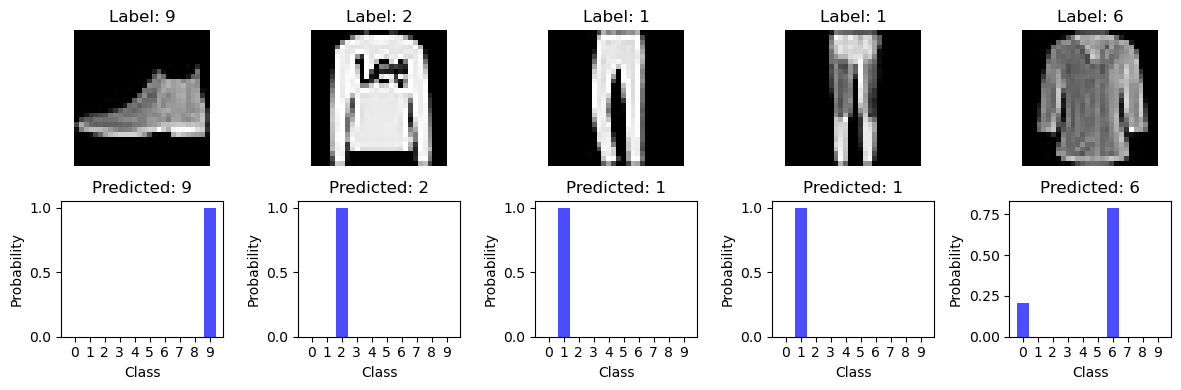

In [47]:
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(test_data[i], cmap='gray')  
    plt.title(f"Label: {test_labels[i]}")  
    plt.axis('off')

    plt.subplot(2, num_samples, i + num_samples + 1)
    plt.bar(range(10), predictions[i], color='blue', alpha=0.7)
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.xticks(range(10))
    plt.xlabel("Class")
    plt.ylabel("Probability")

plt.tight_layout()
plt.show()


# Висновок:
Нам вдалося налаштувати модель згідно з умовами завдання. В процесі оптимізації моделі змінювалися різні гіперпараметри і були обрані такі значення:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - PReLU
3. Кількість нейронів 1 внутрішнього шару - 256
4. Кількість нейронів 2 внутрішнього шару - 128
5. Кількість епох - 50
6. Розмір батчу - 250
7. Оптимізатор - Adam
8. Метод регуляризації - Dropout